# Homework Assignment #1

*due Tuesday, February 5, 2019 by 11:59pm*

This homework is worth **10 points** [100%] with the option to score **extra 1.5 points [15%]** if you submit the additional questions.

### n.b.
All deliverables are required to be typed and all graphs and statistical output generated in Jupyter Notebook using Python and associated packages. Deliverables with *any* handwritten elements will not be accepted and will receive a grade of zero. 

You are required to upload the ```ipynb``` file to **your private GitHub repository within the MSCS686 organization** as the deliverable. Use the ```homework_01.ipynb``` file as a template and write the answers in text and include relevant code below each question. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data
Make sure you completed the following:
* Created `data` directory in the `hw1` folder
* Downloaded the [housing data](https://s3-us-west-1.amazonaws.com/usfca-cs686-ml/hw1/housing.csv) to the `data` directory

In [2]:
# Path to housing.csv
data_path = os.path.join("data", "housing.csv")

if not os.path.exists(data_path):
    print("Download data first!")

## Part 1: Read & clean data [total of 50%]

#### 1.1 Read the data to a pandas DataFrame, print the first 7 entries [10%]
**IMPORTANT**: Read the data so that **`Id`** is set as the index column.<br/>
HINT: Refer to the [docs](https://pandas.pydata.org/pandas-docs/stable/index.html)

In [3]:
df = pd.read_csv("data/housing.csv", index_col="Id")
df.head(7)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


#### 1.2 Print the names of columns, and number of rows and columns in the DataFrame [10%]

In [4]:
print("Columns values:", df.columns.values)
print("Number of columns:", len(df.columns))
print("Number of rows:", len(df.index))

Columns values: ['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSo

#### 1.3

#### (a) Create a subset of original dataset with the  rows 200 to 1400 and the columns according to the list below. [5%]

In [5]:
# DO NOT CHANGE THIS CELL
cols = ['LotFrontage', 'LotArea', 'Neighborhood', 'OverallCond', 'YearBuilt', 'YrSold', 'GrLivArea', '1stFlrSF', '2ndFlrSF',
       'SaleCondition', 'SalePrice']

In [6]:
subdf = df.loc[200:1400, cols]

#### (b) Rename column`YrSold` to `YearSold` [5%]

In [7]:
subdf.rename(columns={'YrSold': 'YearSold'}, inplace=True)

#### 1.4 Some values in the `LotFrontage` column are missing, fill them with *average* value [10%]

In [8]:
subdf["LotFrontage"].fillna(subdf["LotFrontage"].mean())

Id
200      76.00000
201      80.00000
202      75.00000
203      50.00000
204      69.84919
205      50.00000
206      99.00000
207      40.00000
208      69.84919
209      69.84919
210      75.00000
211      67.00000
212      83.00000
213      72.00000
214      43.00000
215      69.84919
216      72.00000
217      65.00000
218      57.00000
219      69.84919
220      43.00000
221      73.00000
222      69.84919
223      85.00000
224      70.00000
225     103.00000
226      21.00000
227      82.00000
228      21.00000
229      70.00000
          ...    
1371     90.00000
1372     80.00000
1373     75.00000
1374     69.84919
1375     85.00000
1376     89.00000
1377     52.00000
1378     60.00000
1379     21.00000
1380     73.00000
1381     45.00000
1382     69.84919
1383     60.00000
1384     69.84919
1385     60.00000
1386     40.00000
1387     80.00000
1388     60.00000
1389     42.00000
1390     60.00000
1391     70.00000
1392     65.00000
1393     68.00000
1394     60.00000
1395   

#### 1.5 Answer the following questions with the *subset* of the data:
Each subquestion is worth **1%**

#### 1.5.1 What were the basic statistics of house prices? (mean, std, min, 25%, 50%, 75%, max)

In [9]:
subdf["SalePrice"].describe()

count      1201.000000
mean     180951.324729
std       80535.850068
min       34900.000000
25%      130000.000000
50%      162900.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### 1.5.2 What's the average lot size in square feet? How about the standard deviation?
HINT: Use the column `LotArea`

In [10]:
print("Mean: ",subdf["LotArea"].mean())
print("Standard deviation: ",subdf["LotArea"].std())

Mean:  10585.005828476269
Standard deviation:  10772.09507488984


#### 1.5.3 What year was the oldest house build?

In [11]:
subdf["YearBuilt"].min()

1872

#### 1.5.4 Follow-up question to the previous one: What was the sale condition of that house?

In [12]:
subdf.loc[subdf["YearBuilt"].idxmin()]["SaleCondition"]

'Normal'

#### 1.5.5 How many houses were built in 2008? How about 2009?

In [13]:
print("Number of houses builted in 2008: ", len(subdf[subdf["YearBuilt"] == 2008]))
print("Number of houses builted in 2008: ", len(subdf[subdf["YearBuilt"] == 2009]))

Number of houses builted in 2008:  19
Number of houses builted in 2008:  15


#### 1.5.6 Break-down median prices of houses by year in sold they were sold

In [14]:
subdf.groupby(['YearSold'])["SalePrice"].median()

YearSold
2006    162950
2007    167000
2008    165400
2009    160850
2010    155000
Name: SalePrice, dtype: int64

#### 1.5.7 What is the average difference between 1st Floor (`1stFlrSF`) and 2nd Floor (`2ndFlrSF`) square feet?

In [15]:
(subdf["1stFlrSF"] - subdf["2ndFlrSF"]).mean()

810.7726894254788

#### 1.5.8 In what neighborhood is the most expensive house situated?

In [16]:
subdf.loc[subdf["SalePrice"].idxmax()]["Neighborhood"]

'NoRidge'

#### 1.5.9 What was the average price of houses with overall condition 8 or higher, built after 1960 (inclusive) and sold before 2009 (exclusive)?

In [17]:
subdf[(subdf["OverallCond"]>=8) & (subdf["YearBuilt"]>=1960) & (subdf["YearSold"]<2009)]["SalePrice"].mean()

169352.9411764706

#### 1.5.10 Display the house with id 987? Display the 472nd house in the dataset?

In [18]:
print("id 987:\n", subdf.loc[987])
print("472nd:\n", subdf.iloc[472-1])

id 987:
 LotFrontage           59
LotArea             5310
Neighborhood     OldTown
OverallCond            8
YearBuilt           1910
YearSold            2006
GrLivArea           1635
1stFlrSF            1001
2ndFlrSF             634
SaleCondition     Normal
SalePrice         117000
Name: 987, dtype: object
472nd:
 LotFrontage           64
LotArea             8633
Neighborhood     CollgCr
OverallCond            5
YearBuilt           2005
YearSold            2009
GrLivArea           1476
1stFlrSF             738
2ndFlrSF             738
SaleCondition     Normal
SalePrice         173500
Name: 671, dtype: object


## Part 2: Plotting [total of 30%]

#### 2.1 Univariate (1 variable) [10%, 3.3% each]

#### 2.1.1 Plot the distribution of sale price

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


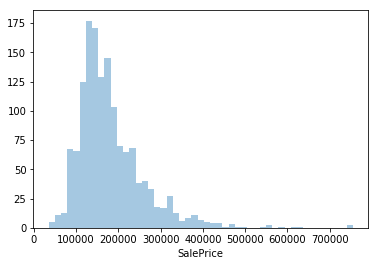

In [19]:
sns.distplot(df["SalePrice"], kde=False)

#### 2.1.2 Plot the histogram of the overall condition

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a209b1eb8>]],
      dtype=object)

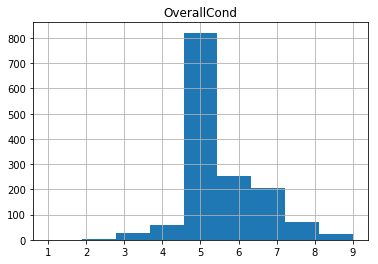

In [20]:
df.hist(column="OverallCond", bins=9)

#### 2.1.3 Create one univariate plot of your own choice

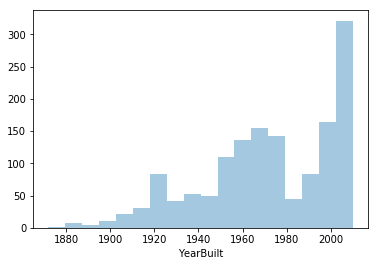

In [21]:
sns.distplot(df["YearBuilt"], kde=False)

#### 2.2 Bivariate (2 variables) [10%, 3.3% each]

#### 2.2.1 Plot the scatter plot displaying the relationship between above ground living area (`GrLivArea`) and sale price

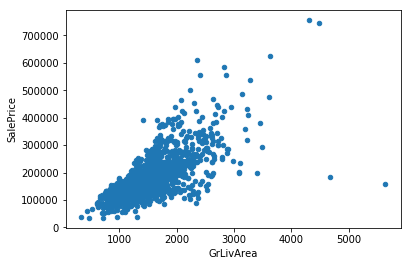

In [22]:
df.plot.scatter(x="GrLivArea", y="SalePrice");

#### 2.2.2 Plot the boxplot of the relationship between the overall condition and the sale price
HINT: The result should look something like [this](https://s3-us-west-1.amazonaws.com/usfca-cs686-ml/hw1/boxplot_result.png) (however, it's OK if yours looks different as long as you use the right type of plot, data and the right variables)

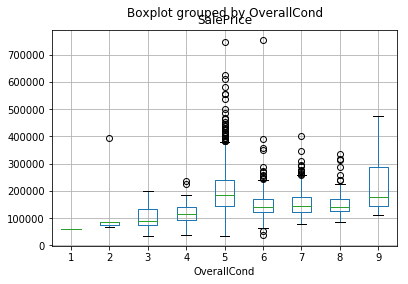

In [23]:
df.boxplot(column="SalePrice", by="OverallCond")

#### 2.2.3 Create one bivariate plot of your own choice

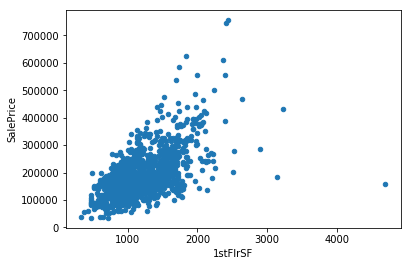

In [24]:
df.plot.scatter(x="1stFlrSF", y="SalePrice");

#### 2.3 Multivariate (2+ variables) [10%, 3.3% each]

#### 2.3.1 Plot the scatter plot displaying the relationship between lot area and sale price, colored by the overall condition

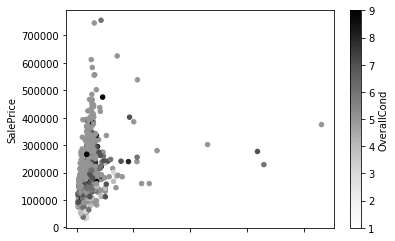

In [25]:
df.plot.scatter(x="LotArea", y="SalePrice", c="OverallCond")

#### 2.3.2 Create one multivariate plot of your own choice

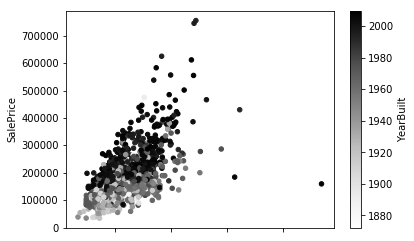

In [26]:
df.plot.scatter(x="1stFlrSF", y="SalePrice", c="YearBuilt")

## Part 3: Theory [total of 20%]

### 3.1 Central Limit Theorem (CLT) [total of 10%]

#### 3.1.1 Create an array on 100 000 samples, sampled from a uniform distribution [2%]
HINT: check [this](https://docs.scipy.org/doc/numpy-1.14.5/reference/generated/numpy.random.uniform.html)

In [27]:
dis = np.random.uniform(-1000, 1000, 100000)

#### 3.1.2 Plot the distribution of the data. Does it look like a uniform distribution?  [2%]
HINT: check [this](https://seaborn.pydata.org/tutorial/distributions.html)

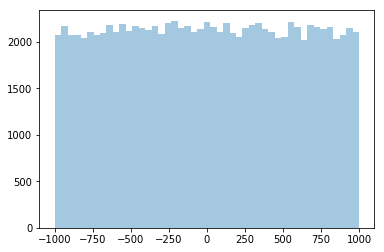

In [28]:
sns.distplot(dis, kde=False)

#### 3.1.3 Randomly shuffle the data, create pairs ($n=2$) with the original and than average the value of the pair  [1.5%]
In other words:

1. Create new array by shuffling the data you sampled in `3.1.1` ([HINT](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.permutation.html))
2. Stack the new array with the original data into a single 2-D array of shape (100000, 2) ([HINT](https://docs.scipy.org/doc/numpy/reference/generated/numpy.stack.html))
3. Average the newly formed 2-D array by 2nd dimension (i.e. mean with `axis=1`)

In [29]:
newdis = np.stack((np.random.permutation(dis), dis), axis=-1)
avg = np.mean(newdis, axis=1)

#### 3.1.4 Similarly to `3.1.2`, plot the distribution of the pairs. What distribution does it look like? [1.5%]

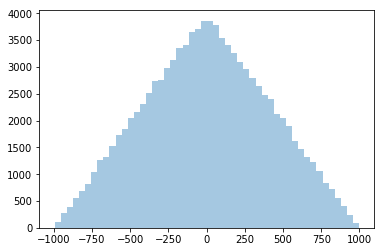

In [30]:
sns.distplot(avg, kde=False)

#### 3.1.5 Compute the mean and standard deviation of the original data and the newly formed data. [1.5%]

In [31]:
print(dis.mean())
print(np.std(dis))
print(avg.mean())
print(np.std(avg))

0.4262322544767466
575.0861307718798
0.42623225447674706
406.9491039760349


#### 3.1.6 Repeat `3.1.3`, `3.1.4` and `3.1.5` for $n=5$. In one sentence, describe how the distribution have changed? Namely think about how the mean $\mu$ and stardard deviation $\sigma$ changed. [1%]
HINT: Similarly to `3.1.3`, shuffle the original data 4 times and then stack into a 2-D array of shape (100000,5). The remaining steps will be the same

0.4262322544767466
575.0861307718798
0.42623225447674673
257.7936872352486


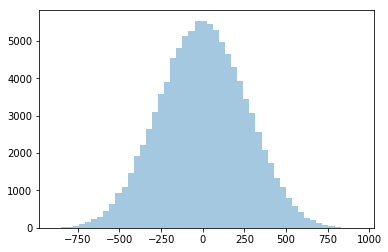

In [32]:
newdis2 = np.stack((np.random.permutation(dis), np.random.permutation(dis), np.random.permutation(dis), np.random.permutation(dis), dis), axis=-1)
avg2 = np.mean(newdis2, axis=1)
sns.distplot(avg2, kde=False)
print(dis.mean())
print(np.std(dis))
print(avg2.mean())
print(np.std(avg2))

#### Conclusion:
For my uniform samples, the distribution would become more concentrate on 0, the mean of new data is similar to mean of original data and standar diviation would become small with the $n$ increase

#### 3.1.7 Now, do the same for $n=10$. [0.5%]

0.4262322544767466
575.0861307718798
0.4262322544767466
181.62090212994912


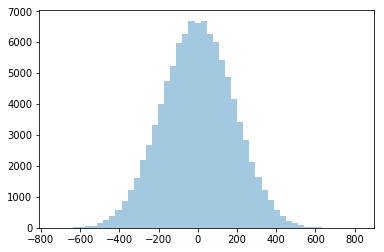

In [33]:
newdis3 = np.stack((np.random.permutation(dis), np.random.permutation(dis), \
                    np.random.permutation(dis), np.random.permutation(dis), \
                    np.random.permutation(dis), np.random.permutation(dis), \
                    np.random.permutation(dis), np.random.permutation(dis), \
                    np.random.permutation(dis), dis), axis=-1)
avg3 = np.mean(newdis3, axis=1)
sns.distplot(avg3, kde=False)
print(dis.mean())
print(np.std(dis))
print(avg3.mean())
print(np.std(avg3))

### 3.2 Hypothesis Testing [total of 10%] 

In the following cell, there are data for a given experiment with 2 samples (Control group and Experimental group) with $n=30$ and $\sigma=2.9$.

In [34]:
# DO NOT CHANGE ANYTHING IN THIS CELL
data = np.array([[12.72,  8.83, 14.14, 14.49,  7.15,  8.53, 10.31, 10.59, 14.5 ,
        15.57, 11.67, 11.46, 20.96, 11.2 ,  9.61, 15.69, 13.04, 12.79,
         7.6 , 10.23,  5.63, 10.64, 10.5 ,  8.07, 13.01, 10.43, 11.47,
        11.18, 10.41, 11.71],
       [23.62, 15.67, 23.82, 15.43, 22.04, 23.02, 19.82, 17.13, 20.35,
        28.82, 22.32, 20.53, 21.46, 16.86, 19.16, 15.53, 19.74, 15.92,
        17.69, 20.68, 19.13, 20.51, 20.99, 15.15, 24.42, 22.73, 23.5 ,
        18.18, 16.37, 18.89]]).transpose()

df = pd.DataFrame(data, columns=["Control", "Experimental"])
df

,Control,Experimental
0,12.72,23.62
1,8.83,15.67
2,14.14,23.82
3,14.49,15.43
4,7.15,22.04
5,8.53,23.02
6,10.31,19.82
7,10.59,17.13
8,14.50,20.35
9,15.57,28.82


#### 3.2.1 Show whether there exists a statistically significnat difference between the "Control" group and the "Experimentla group at the $\alpha = 0.05$ level of significnace using Hypothesis testing (assume $\sigma = 2.9$) [8%]

In [35]:
df.mean()

Control         11.471000
Experimental    19.982667
dtype: float64

#### Hypothesis:

$n=30$ and $\sigma=2.9$

$\mu_c=11.471$ and $\mu_e=19.982667$

$H_0: \mu_e = 11.471$   
$H_a: \mu_e \neq 11.471$

$\mu_c$ is Control group mean

$\mu_e$ is Experimental group mean

#### Computation:

$z^*=\frac{x-\mu_c}{\sigma/\sqrt{n}}=\frac{19.982667-11.471}{2.9/\sqrt{30}}= 16.075971845855644$

$\left|z^*\right| \geq \left|z_\frac{\alpha}{2}\right| = \left|z_\frac{0.05}{2}\right| = 1.96$

#### Conclusion:
We reject the $\mu_e = \mu_c = 11.471$ (reject no significant difference between the Conrtol group and Experimental group at $\alpha = 0.05$, hence accept $H_a: \mu_e \neq 11.471$)

In [36]:
import math
(df["Experimental"].mean()-df["Control"].mean())/(2.9/math.sqrt(30))

16.075971845855644

#### 3.2.2 Now, confirm the above result of your Hypothesis test using Confidence intervals [total of 2%]

$x_e=19.982667$ , $\sigma=2.9$ and $n=30$

$z_\frac{\alpha}{2}=z_\frac{0.05}{2}=1.96$

#### Computation:

$x_e\pm z\frac{\sigma}{\sqrt{n}}=19.982667\pm 1.96\times \frac{2.9}{\sqrt{30}}$

$19.982667\pm 1.037752\Rightarrow \left[18.944915,21.020419\right]$

#### Conclusion:
Observe that the CI does not catain the assumed experimental group mean $\mu_e = 11.471$

## Additional Question [BONUS]

*All regular homework questions must be completed to receive any bonus points.*

#### 4.1 Bayes theorem [total of 5% extra]
Emma has lost her watch in either classroom $A$ (with a probability $0.4$) or in classroom $B$ (with a probability $0.6$). On any given break, if the watch is in $A$ and Emma spends the break searching for it in $A$, the conditional probability that she will find the watch during that break is $0.25$. Similarly, if the watch is in $B$ and Emma spends a break looking for it there, the conditional probability that she will find the watch during that break is $0.15$. The watch cannot be moved from one classroom to the other. Emma can search only during the break between classes, and she can move from one classroom to the other only during classes.

1. In which classroom should Emma look to maximize the probability that she finds her watch on the first
    break of the search?
2. Given that Emma looked in $A$ during the first break but didn’t find her watch, what is the probability
    that the watch is in $A$?
3. If Emma flips a fair coin to determine where to look during the first break and finds the watch during
    the first break, what is the probability that she looked in $A$?
4. If the watch is not stolen and not found by the Nth break of the search, it will be stolen that break
    with probability $\frac{N}{N+2}$. Emma has decided to look in $A$ during the first two breaks. What is the
    probability that she will find her watch for the first time during the second break?
    
##### Refresher:
* **Law of total probability** $$P(A) = \sum_{n}{P(A|B_{n}) P(B_{n})}$$
* **Bayes theorem** - $$P(B|A) = \frac{P(A|B) P(B)}{P(A)}$$

**Type your answer in this cell**

Use $\LaTeX$ where appropriate

#### 4.2 Kaggle exploratory data analysis [total of 10% extra]

This is more of an open-ended question related to the on-going [Kaggle](https://www.kaggle.com/) competition: [Elo Merchant Category Recommendation](https://www.kaggle.com/c/elo-merchant-category-recommendation). In order to get the extra credit you need to **either**:

* Download the [data](https://www.kaggle.com/c/elo-merchant-category-recommendation/data), create a new Jupyter Notebook (outside of this one) and perform an exploratory data analysis of your own. Your submission will then be the **.ipynb file** with EDA of the competition data.
* Create a [Kaggle kernel](https://www.kaggle.com/c/elo-merchant-category-recommendation/kernels) (i.e. a Jupyter notebook that runs on Kaggle's infrastructure). Your submission will then be the **URL** to the Kaggle kernel.

Feel free look for inspiration in other Kaggle kernels, **however do not copy/paste any code without citing the source.** If you do copy a piece of code without the appropriate resource citing, you will be deducted 1 point. In order to receive the extra credit, at least 50% of the notebook should be your own work. This question will be graded on a continuous scale, the more extensive your analysis, the more points will be attributed.